## Health Insurance Premium Prediction - Regression

Health Insurance is a type of insurance that covers medical expenses. A person who has taken a health insurance policy gets health insurance cover by paying a particular premium amount. 

In recent years, the healthcare industry has undergone significant transformations, particularly with the increasing complexity of health insurance systems. Understanding the factors that influence health insurance charges is crucial for both insurers and consumers. With the rising cost of healthcare, accurate predictions of insurance premiums can help individuals make informed decisions about their coverage options.

This regression project aims to analyze and predict health insurance charges based on various factors, including age, sex, body mass index (BMI), number of children, smoking status, and regional differences. By leveraging statistical and machine learning techniques, we seek to uncover patterns and relationships within the data that can provide insights into how these variables impact insurance costs.
The primary objectives of this project are as follows:
* Data Exploration: To perform an in-depth analysis of the dataset, identifying key trends and correlations among the features.
* Model Development: To build regression models that accurately predict insurance charges based on the input features, using techniques such as linear regression, decision trees, and advanced machine learning algorithms.
* Performance Evaluation: To assess the effectiveness of the models using metrics such as R² score, mean absolute error, and root mean squared error, ensuring that the predictions are both reliable and actionable.


### Column Descriptions
* Age:The age of the individual.Age is a significant factor in healthcare expenses; generally, costs increase with age.

* Sex:The gender of the individual (e.g., male or female).Gender can influence insurance premiums; health expenditures may differ between men and women.
* Bmi:Body Mass Index, a measure of body weight relative to height.BMI provides insights into an individual's health status, with higher BMI often correlating with increased health expenses.BMI (Body Mass Index) is a value calculated by dividing body weight (in kilograms) by the square of height (in meters). BMI is a simple measure used to assess whether a person is overweight, normal weight, underweight or obese.

* Children:The number of dependent children the individual has.The number of children can impact total healthcare costs; more children typically lead to higher expenses.

* Smoker:Whether the individual is a smoker (e.g., yes or no).Smokers generally have higher healthcare costs; this factor is crucial in determining premiums.

* Region:The geographic area where the individual resides (e.g., Northeast, South, West, Midwest).Region can affect the cost of healthcare services; some areas may have higher healthcare costs.

* Charges:The total amount the individual pays for health insurance.This is the target variable for analysis and helps understand the factors influencing healthcare expenses.

<img src='health.jpg' width=550 >

### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv('Health_insurance.csv')
#Read the file.

### EDA - Exploratory Data Analysis

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


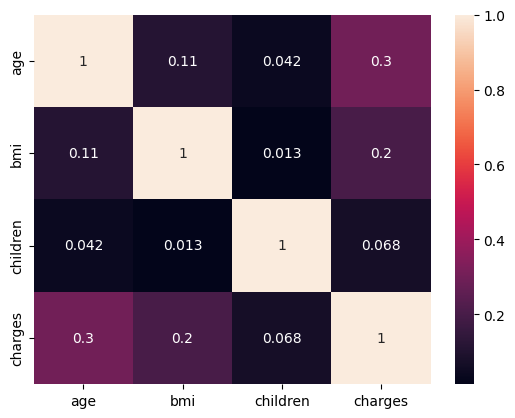

In [9]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

### Data Visualization

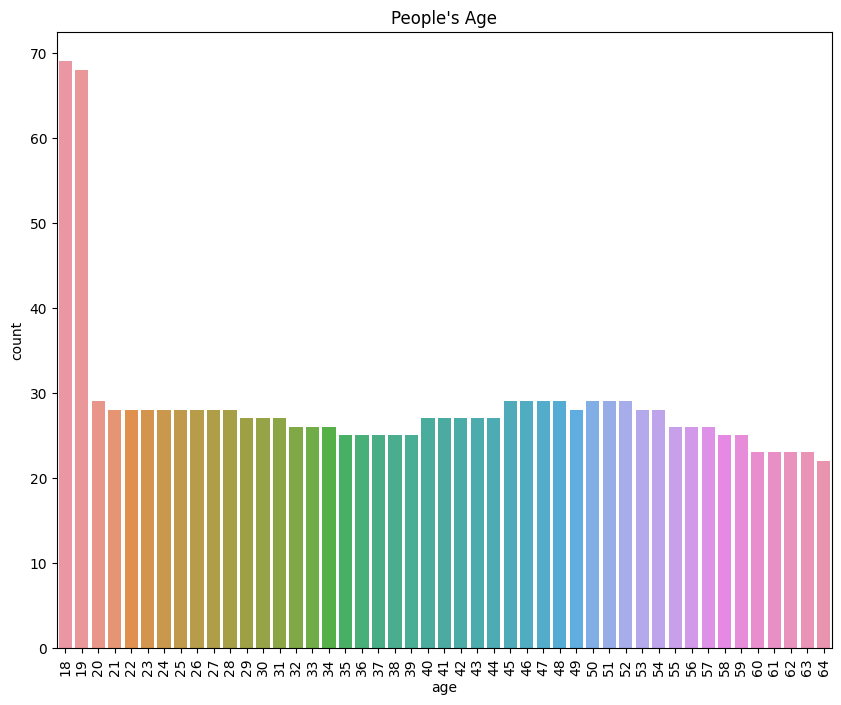

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['age'])
plt.xticks(rotation=90)
plt.title("People's Age");

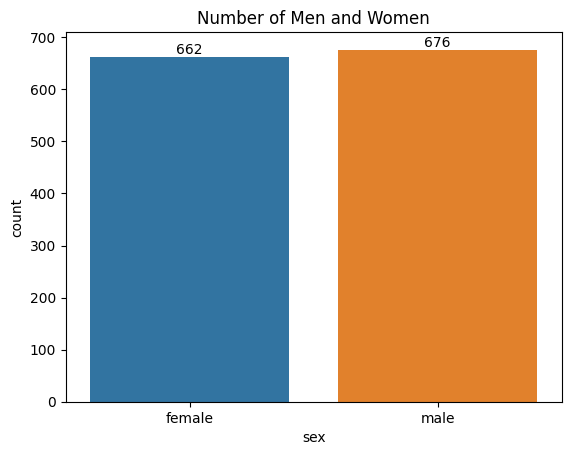

In [11]:
ax=sns.countplot(x=df['sex'])
ax.bar_label(ax.containers[0])
plt.title('Number of Men and Women');

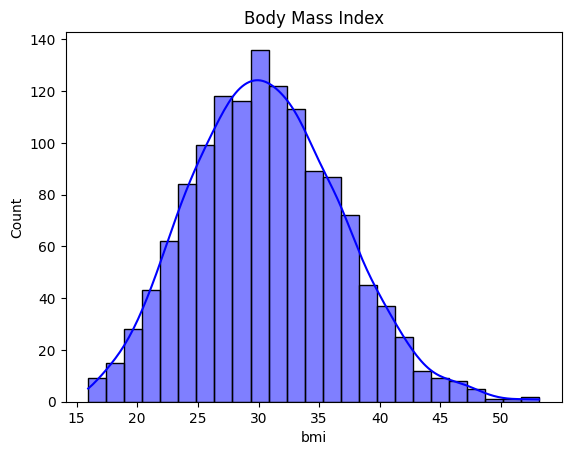

In [12]:
sns.histplot(x=df['bmi'], kde=True, color='blue')
plt.title('Body Mass Index');

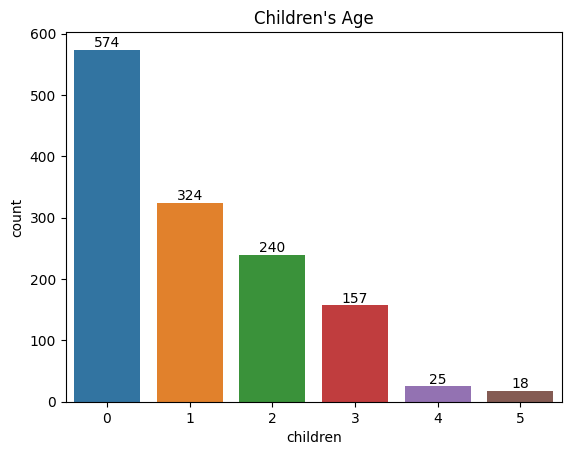

In [13]:
ax=sns.countplot(x=df['children'])
ax.bar_label(ax.containers[0])
plt.title("Children's Age");

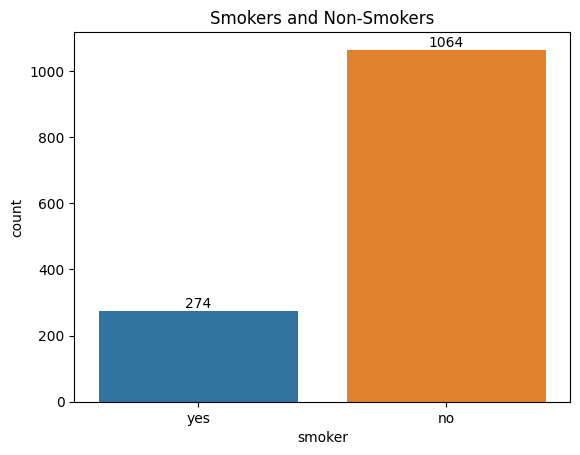

In [14]:
ax=sns.countplot(x=df['smoker'])
ax.bar_label(ax.containers[0])
plt.title('Smokers and Non-Smokers');

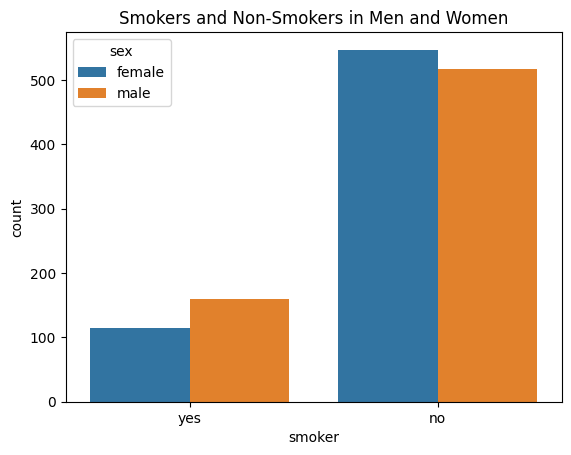

In [15]:
sns.countplot(x=df['smoker'],hue=df.sex)
plt.title('Smokers and Non-Smokers in Men and Women');

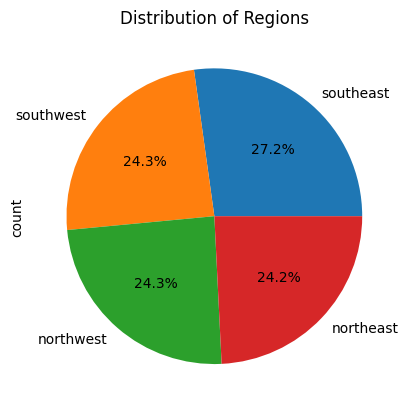

In [16]:
df['region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Regions');

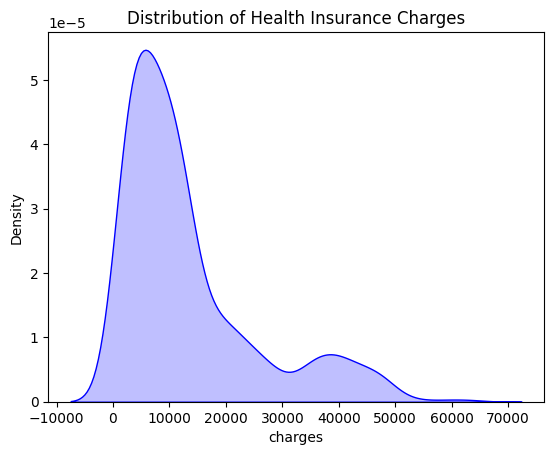

In [17]:
sns.kdeplot(x=df['charges'], fill=True, color='blue')
plt.title('Distribution of Health Insurance Charges');

### Modelling

In [10]:
x=df.drop('charges', axis=1)
y=df[['charges']]

In [11]:
x=pd.get_dummies(x,drop_first=True)

In [12]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [13]:
lr=LinearRegression()
model=lr.fit(x_train, y_train)
pred=lr.predict(x_test)
rmse=mean_squared_error(y_test, pred)**.5
r2=r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

Root Mean Squared Error: 5796.284659276273
R2 Score: 0.7835929767120724


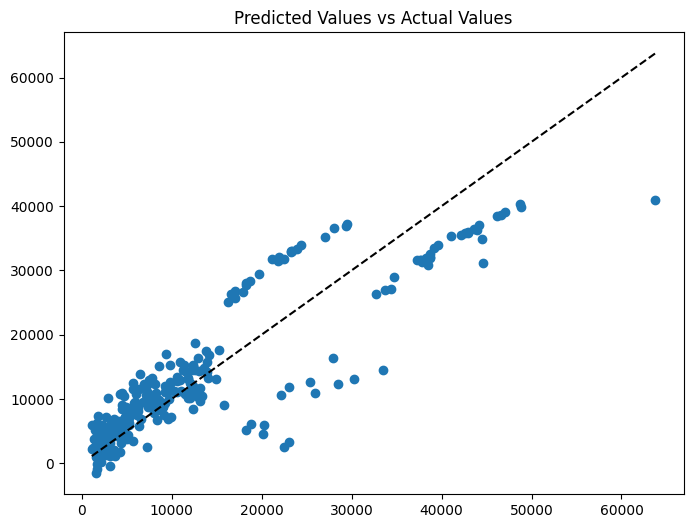

In [14]:
y_pred=model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.title('Predicted Values vs Actual Values');
#for Linear Regression

In [15]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':lr.coef_[0]})

In [16]:
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

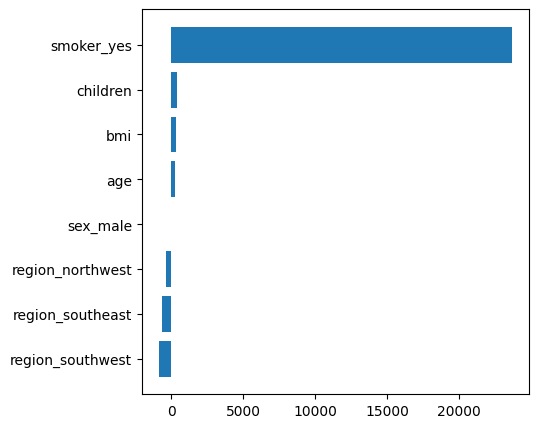

In [17]:
plt.figure(figsize=(5,5))
plt.barh(feature_importance['Feature'],feature_importance['Coefs'])
plt.gca().invert_yaxis()

In [18]:
residuals=y_test-pred

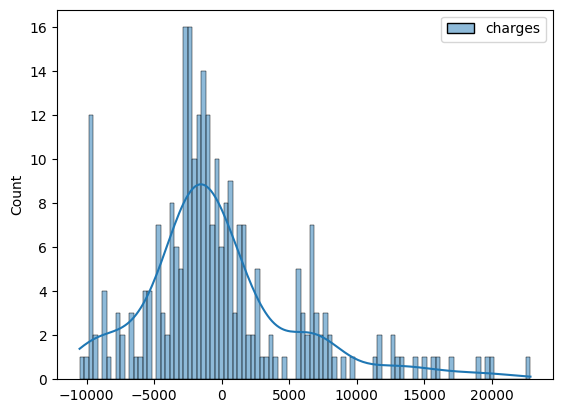

In [19]:
sns.histplot(residuals, kde=True,bins=100);

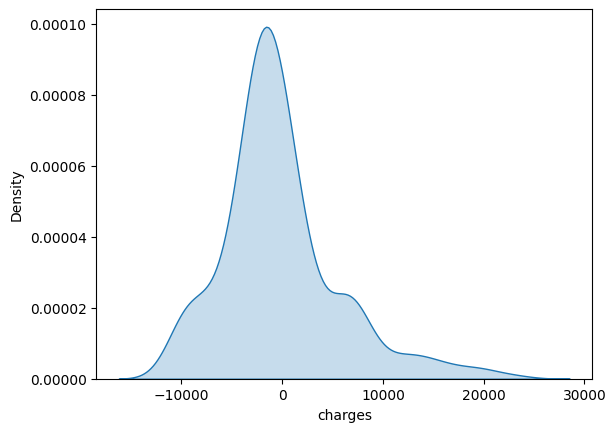

In [20]:
sns.kdeplot(x=residuals['charges'], fill=True);

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler


def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        sgd=SGDRegressor()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        rkn=RadiusNeighborsRegressor(radius=1.0)
        ada=AdaBoostRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
        svr=SVR()
        mlp_regressor = MLPRegressor()

        algos=[L,R,Lass,E,sgd,ETR,GBR,ada,kn,dt,xgb,svr,mlp_regressor]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','SGD','Extra Tree','Gradient Boosting',
                    'KNeighborsRegressor','AdaBoost','Decision Tree','XGBRegressor','SVR','mlp_regressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.20,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
        
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
   
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [30]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,8.788630e-01,4.336630e+03,2.456902e+03
XGBRegressor,8.490506e-01,4.840940e+03,2.765747e+03
KNeighborsRegressor,8.268128e-01,5.185276e+03,4.031295e+03
Linear,7.835930e-01,5.796285e+03,4.181194e+03
Lasso,7.835376e-01,5.797026e+03,4.182426e+03
Ridge,7.832830e-01,5.800434e+03,4.193585e+03
Decision Tree,7.278780e-01,6.499738e+03,3.179900e+03
Extra Tree,7.264494e-01,6.516777e+03,3.073642e+03
ElasticNet,4.185585e-01,9.500950e+03,7.423855e+03
AdaBoost,1.871111e-01,1.123388e+04,7.635809e+03


### Regression AutoML with PyCaret

In [31]:
#pip install pycaret

In [32]:
from pycaret.regression import*

In [33]:
setup(data=df, target='charges')

,Description,Value
0,Session id,7593
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [34]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2585.9642,22174368.7298,4680.4044,0.8425,0.4303,0.3028,0.0470
rf,Random Forest Regressor,2806.3507,24963962.7315,4973.1334,0.8216,0.4511,0.3175,0.1010
lightgbm,Light Gradient Boosting Machine,2970.2351,25317748.5559,5013.7623,0.8190,0.5532,0.3577,0.3390
ada,AdaBoost Regressor,3963.1917,26464174.8436,5133.8840,0.8097,0.6154,0.6841,0.0290
xgboost,Extreme Gradient Boosting,3158.7475,29140625.4000,5385.7930,0.7904,0.5790,0.4180,0.0720
et,Extra Trees Regressor,2930.1584,29732417.9867,5437.9330,0.7859,0.4817,0.3288,0.0820
ridge,Ridge Regression,4224.2095,37591873.4750,6106.4343,0.7329,0.5557,0.4188,0.0280
br,Bayesian Ridge,4218.8786,37588785.4958,6106.3838,0.7328,0.5565,0.4180,0.0250
llar,Lasso Least Angle Regression,4212.8243,37585295.6505,6106.3207,0.7328,0.5577,0.4171,0.0230
lar,Least Angle Regression,4212.7926,37587125.9658,6106.4829,0.7328,0.5579,0.4171,0.0240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Summary

This project focuses on analyzing and predicting health insurance rates using a regression approach. As healthcare costs increase, understanding the factors that affect insurance premiums is important for both consumers and insurers. We examined and organized our data. We made graphical examinations and understood the data better. Then, we successfully trained our model. Our best model was gradient boosting with 87 percent. We used Pycaret. Gradient boosting was again the best model in Pycaret.We didn't apply deep learning because our success rate was high.We completed our project.